# Autoencoders

## Preprocess Images

In [1]:
# Import libraries

from random import randint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow.keras import layers
from tensorflow import keras

## Loading
### A-Z Handwritten Alphabets
Source: https://www.kaggle.com/sachinpatel21/az-handwritten-alphabets-in-csv-format

In [2]:
# Load handwritten alphatbet dataset

alphabets_data = pd.read_csv('datasets/A_Z Handwritten Data.csv', header=None)

alphabets_data.sample(10)

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
280923,18,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
72613,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
326526,20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
64877,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
307101,20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
182309,14,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15206,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
200159,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
157130,14,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
294532,19,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# Data shape

alphabets_data.shape

(372451, 785)

In [4]:
# Lets use 5 percent of the data

alphabets_data = alphabets_data.sample(frac=0.05).reset_index(drop=True)

alphabets_data.shape

(18623, 785)

In [5]:
sorted(alphabets_data[0].unique())

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25]

In [6]:
# Setup a lookup dictionary

lookup = { 0: 'A', 1: 'B', 2: 'C', 3: 'D',
           4: 'E', 5: 'F', 6: 'G', 7: 'H',
           8: 'I', 9: 'J', 10: 'K', 11:'L',
           12: 'M', 13: 'N', 14: 'O', 15: 'P',
           16: 'Q', 17: 'R', 18: 'S', 19: 'T',
           20: 'U', 21: 'V', 22: 'W', 23: 'X',
           24: 'Y', 25: 'Z'
         }

In [7]:
# Extract features from the data

features = alphabets_data[alphabets_data.columns[1:]]

target = alphabets_data[0]

In [8]:
# Shape of the features

features.shape

(18623, 784)

In [9]:
# Reshape our features into 28 x 28 pictures

features = features.values.reshape(len(features), 28, 28)

In [10]:
features.shape

(18623, 28, 28)

In [11]:
# label correponding at index 10

target.loc[10]

24

In [12]:
# Features of the image

features[10][10:15]

array([[  0,   0,   0,   0,   1,   1, 178, 255, 254, 134,   0,   0,   0,
          0,   0,  15, 159, 255, 249,  98,   5,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  95, 250, 255, 201,   0,   0,   0,
          0,   1,  97, 237, 255, 161,  18,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  22, 184, 255, 239,  38,   0,   0,
          0,  55, 207, 255, 232,  55,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 111, 255, 253, 151,   5,   0,
         34, 172, 255, 250, 116,   8,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  50, 227, 255, 241,  19,  13,
        132, 247, 250, 170,  13,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0]], dtype=int64)

### Displaying image

In [13]:
# Helper function to display image and label associated with image

def show_image(features, actual_label):
    
    print("Actual label: ", lookup[actual_label])
    plt.imshow(features, cmap='Greys')
    
    plt.show()

Actual label:  Y


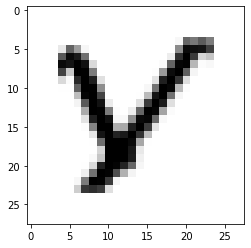

In [14]:
show_image(features[10], target[10])

Actual label:  O


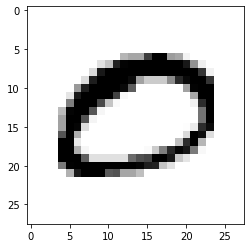

In [15]:
show_image(features[20], target[20])

#### Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255

In [16]:
features = features.astype(np.float32) / 255

In [17]:
# Lets see scaled pixel values

features[10][10:20]

array([[0.        , 0.        , 0.        , 0.        , 0.00392157,
        0.00392157, 0.69803923, 1.        , 0.99607843, 0.5254902 ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.05882353, 0.62352943, 1.        , 0.9764706 , 0.38431373,
        0.01960784, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.37254903, 0.98039216, 1.        , 0.7882353 ,
        0.        , 0.        , 0.        , 0.        , 0.00392157,
        0.38039216, 0.92941177, 1.        , 0.6313726 , 0.07058824,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.08627451, 0.72156864, 1.        , 0.9372549 ,
        0.14901961, 0.        , 0.        , 0.        , 0.21568628,
        0.8117647 , 1.    

### Splitting dataset into training and testing data

In [20]:
# Train test split

from sklearn.model_selection import train_test_split

train_images, test_images, train_labels, test_labels = train_test_split(features,
                                                                        target,
                                                                        test_size=0.2)

In [21]:
# Train shape

train_images.shape

(14898, 28, 28)

In [23]:
# Test_images.shape

test_images.shape

(3725, 28, 28)

## Reconstructing Images Using a Stacked Autoencoder

In [24]:
# Building stack encoder using Sequential model

stacked_encoder = tf.keras.models.Sequential([
    
    layers.Flatten(input_shape=[28, 28]),
    
    layers.Dense(64, activation="relu"),
    layers.Dense(32, activation='relu'),
    
    layers.Dense(16, activation="relu")
])

In [25]:
stacked_encoder.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
Total params: 52,848
Trainable params: 52,848
Non-trainable params: 0
_________________________________________________________________


In [26]:
# Building stack decoder using Sequential model

stacked_decoder = tf.keras.models.Sequential([
    
    layers.Dense(32, activation='relu', input_shape=[16]),
    
    layers.Dense(64, activation='relu'),
    
    layers.Dense(28 * 28, activation='relu'),
    
    layers.Reshape([28, 28])
])

In [28]:
# Stack the decoder and encoder using a Sequential model

ae_model = tf.keras.models.Sequential([stacked_encoder, stacked_decoder])

ae_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 16)                52848     
_________________________________________________________________
sequential_1 (Sequential)    (None, 28, 28)            53616     
Total params: 106,464
Trainable params: 106,464
Non-trainable params: 0
_________________________________________________________________


In [31]:
# Compile model

ae_model.compile(loss='mean_squared_error',
                 optimizer=tf.keras.optimizers.RMSprop(),
                 metrics=['mse'])

In [33]:
# Train model

training_hist = ae_model.fit(train_images,
                             train_images,
                             epochs=20, verbose=True)

Train on 14898 samples
Epoch 1/20
14898/14898 [==============================] - 2s 123us/sample - loss: 0.0565 - mse: 0.0565
Epoch 2/20
14898/14898 [==============================] - 1s 91us/sample - loss: 0.0392 - mse: 0.0392
Epoch 3/20
14898/14898 [==============================] - 1s 90us/sample - loss: 0.0356 - mse: 0.0356
Epoch 4/20
14898/14898 [==============================] - 1s 93us/sample - loss: 0.0335 - mse: 0.0335
Epoch 5/20
14898/14898 [==============================] - 2s 105us/sample - loss: 0.0310 - mse: 0.0310
Epoch 6/20
14898/14898 [==============================] - 1s 96us/sample - loss: 0.0294 - mse: 0.0294
Epoch 7/20
14898/14898 [==============================] - 1s 76us/sample - loss: 0.0284 - mse: 0.0284
Epoch 8/20
14898/14898 [==============================] - 1s 80us/sample - loss: 0.0277 - mse: 0.0277
Epoch 9/20
14898/14898 [==============================] - 2s 105us/sample - loss: 0.0269 - mse: 0.0269
Epoch 10/20
14898/14898 [==============================]

### Reconstructing images

In [34]:

def reconstruct_img(model, images, n_imgs):
    
    random_int = randint(0, images.shape[0] - n_imgs)
    
    reconstructions = model.predict(images[random_int : random_int + n_imgs])
    
    fig = plt.figure(figsize=(n_imgs * 3, 3))
    
    for img_index in range(n_imgs):
        plt.subplot(2, n_imgs, 1 + img_index)
        plt.imshow(images[random_int + img_index], cmap='Greys')
        
        plt.subplot(2, n_imgs, 1 + n_imgs + img_index)
        plt.imshow(reconstructions[img_index], cmap='Greys')

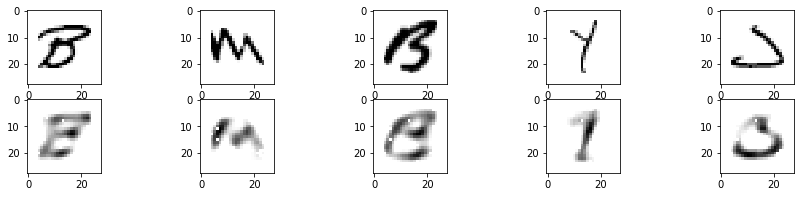

In [38]:
reconstruct_img(ae_model, test_images, 5)

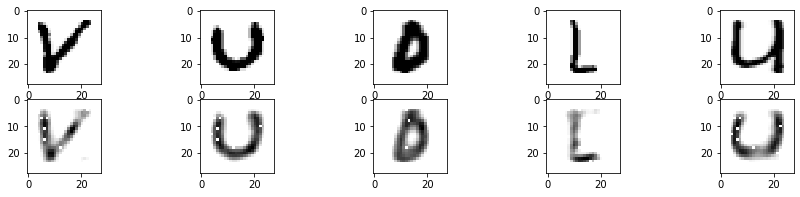

In [37]:
reconstruct_img(ae_model, test_images, 5)

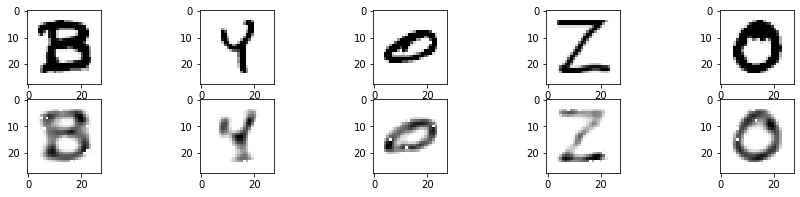

In [39]:
reconstruct_img(ae_model, test_images, 5)

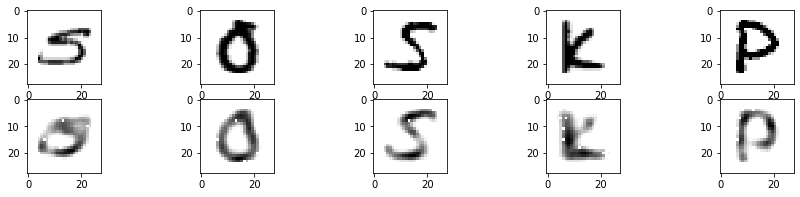

In [40]:
reconstruct_img(ae_model, test_images, 5)

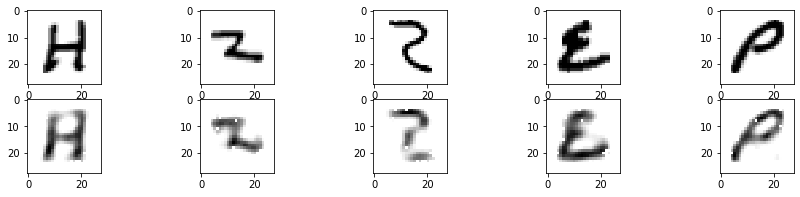

In [41]:
reconstruct_img(ae_model, test_images, 5)

## Reconstructing Images Using a CNN based Autoencoder

In [43]:
# Building a CNN based encoder using a Sequential Model

conv_encoder = tf.keras.models.Sequential([
    
    layers.Reshape([28, 28, 1], input_shape=[28, 28]),
    
    layers.Conv2D(16, kernel_size=3, padding='SAME', activation='relu'),
    layers.MaxPool2D(pool_size=2),
    
    layers.Conv2D(32, kernel_size=3, padding='SAME', activation='relu'),
    layers.MaxPool2D(pool_size=2),
    
    layers.Conv2D(64, kernel_size=3, padding='SAME', activation='relu'),
    layers.MaxPool2D(pool_size=2)
])


In [48]:
# Building a CNN based decoder using a Sequential Model

conv_decoder = tf.keras.models.Sequential([
    
    layers.Conv2DTranspose(32, kernel_size=3, strides=2,
                          padding="VALID", activation="relu",
                          input_shape=[3, 3, 64]),
    
    layers.Conv2DTranspose(16, kernel_size=3, strides=2,
                           padding='SAME', activation='relu'),
    
    layers.Conv2DTranspose(1, kernel_size=3, strides=2,
                           padding='SAME', activation='sigmoid'),
    
    layers.Reshape([28, 28])
])

In [49]:
# Stack ecoder and the decoder

conv_ae_model = tf.keras.models.Sequential([conv_encoder, conv_decoder])

conv_ae_model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_4 (Sequential)    (None, 3, 3, 64)          23296     
_________________________________________________________________
sequential_6 (Sequential)    (None, 28, 28)            23233     
Total params: 46,529
Trainable params: 46,529
Non-trainable params: 0
_________________________________________________________________


In [50]:
# Compile the model

conv_ae_model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                      optimizer=tf.keras.optimizers.SGD(lr=1.0),
                      metrics=['mse'])

In [51]:
# Train the model

training_hist_convAE = conv_ae_model.fit(train_images, train_images, epochs=10)

Train on 14898 samples
Epoch 1/10
14898/14898 [==============================] - 11s 760us/sample - loss: 0.2950 - mse: 0.0700
Epoch 2/10
14898/14898 [==============================] - 11s 724us/sample - loss: 0.1481 - mse: 0.0241
Epoch 3/10
14898/14898 [==============================] - 11s 724us/sample - loss: 0.1267 - mse: 0.0167
Epoch 4/10
14898/14898 [==============================] - 11s 709us/sample - loss: 0.1169 - mse: 0.0134
Epoch 5/10
14898/14898 [==============================] - 11s 757us/sample - loss: 0.1112 - mse: 0.0115
Epoch 6/10
14898/14898 [==============================] - 12s 829us/sample - loss: 0.1071 - mse: 0.0102
Epoch 7/10
14898/14898 [==============================] - 13s 847us/sample - loss: 0.1045 - mse: 0.0093
Epoch 8/10
14898/14898 [==============================] - 16s 1ms/sample - loss: 0.1024 - mse: 0.0086
Epoch 9/10
14898/14898 [==============================] - 12s 799us/sample - loss: 0.1007 - mse: 0.0081
Epoch 10/10
14898/14898 [==================

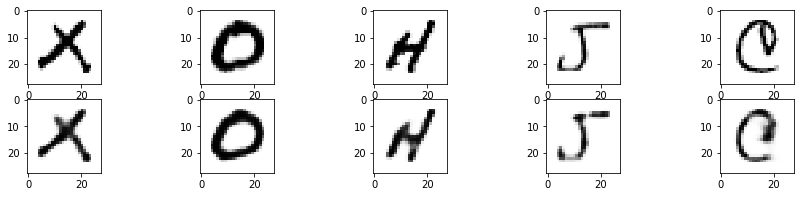

In [52]:
# Test the model

reconstruct_img(conv_ae_model, test_images, 5)

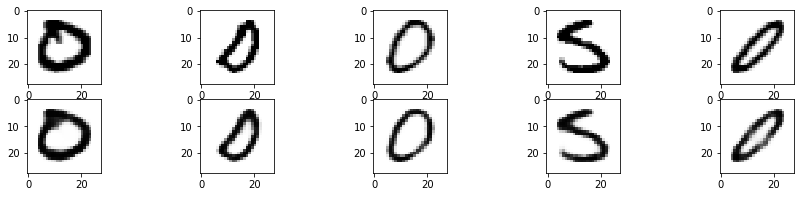

In [53]:
reconstruct_img(conv_ae_model, test_images, 5)

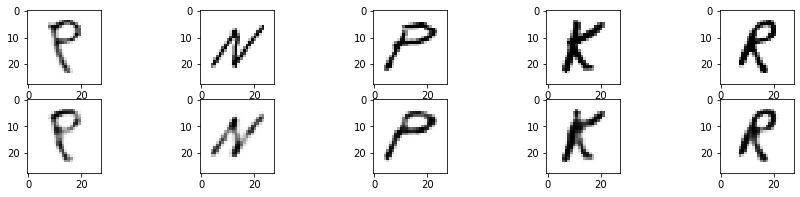

In [54]:
reconstruct_img(conv_ae_model, test_images, 5)

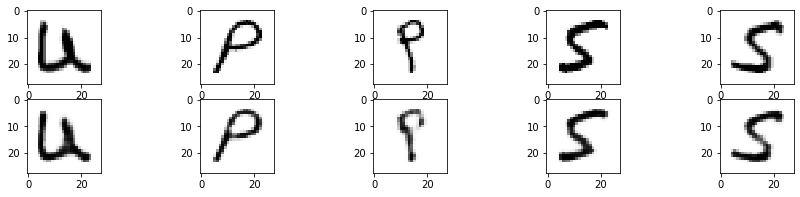

In [55]:
reconstruct_img(conv_ae_model, test_images, 5)